In [1]:
#test import to make sure that the environment works
import torch
import numpy as np
from IPython.display import Image

layer = torch.tensor([1, 2, 3], dtype=float, requires_grad=True)

print(layer)

tensor([1., 2., 3.], dtype=torch.float64, requires_grad=True)


TEST

Links:
https://saturncloud.io/blog/how-to-use-latex-in-jupyter-notebook/

https://en.wikibooks.org/wiki/LaTeX

Outline Very Basic:

#The Main Idea behind Machine Learning

It is well known that machines are potent in processing defined algorithms with its combination of speed, memory, and accuracy. Once a human defined an algorithm, or a series of steps, for the computer to follow, it can do so faster and better than any other human.

However, machines themselves are unable to tackle the more abstract problems such as differentiating a photo of a dog from a cat. 

To humans, this task may be trivial. However, humans themselves are unable to clearly explain their thought process for separating dogs and cats in a concise way. They may suggest tips such as looking at its ears or tail, but this is another ambiguous question in itself, especially to a computer which percieves images not by its greater pattern, but by each individual pixel and its color values. For humans, their brains act like a black box: being able to intuitively process the information accurately but unsure of the exact algorithms underneath. As humans are unable to create a concise algorithm for such intuitive tasks, they cannot write code for a machine to follow in order to accomplish the same task.

So, how do humans do it? Does this mean that humans were born with an innate ability to differentiate between dogs and cats? There are no strong evidence supporting this argument, so the leading theory is that humans develop their classification abilities later on, probably by observing an uncountable amount of dogs and cats throughout their lives. This implies that the classification process can be learnt, most likely by identifying groups of hidden patterns that gives deeper insight than just the raw data itself.

**The broadest idea of machine learning is that there are intrinsic patterns in data. By matching and gathering a large amount input and output pairs, it may be possible to find the function or formula which converts an input into the desired corresponding output.**

The rest of this paper would discuss the more practical concepts in implementing simpler neural network models.

#Embedding Vectors and Representing Information:

Before making a neural network, there needs to be a quantitative way of representing the information mathamatically, even for more unconventional data formats such as audio and videos. This is most commonly done through vectors, matrices, and tensors. These are essencially an array or list of a certain dimension. The process of converting information from one form to a vector space is known as embedding. The general idea is to map objects in the vector space based on their properties, so that more similiar items have a smaller difference between each other. 

Usually, each dimension or direction in the vector space would represent a certain trait or attribute. For instance, in a good embedding of English words, the difference between vectors representing man and woman should be very similar to the difference of vectors of king and queen, boy and girl, father and mother, and so on. However in practice, larger trained neural networks may organize their data in another unknown method in their training.

#Neurons and Linear Layers:

The idea behind a neuron is that it is the smallest possible component in a larger neural network, just like a human's neuron to their brain. While biology and chemistry powers a human neuron, a machine's neuron is defined by math.

In mathamatics, multiplication is the most common way to alter a value's size by its proportion. For instance, multiplying X by 0.5 yields X/2, something half as large in magnitude. Meanwhile, multiplying X by 2 yields 2X, something twice as large in magnitude. This is a useful way to amplify or diminish a value's magnitude without changing its inherent composition (attributes such as its prime factors, which may carry inherent information). For instance, if you multiply 15 by 2 to get 30, it still contain the prime factors 3 and 5 afterwards. Another simple way to manipulate values is addition. This operation can shift a value along the number line, or alternatively a vector along a certain axis. Although addition also affects the size of a value, it will disturb said value's composition. For instance, unlike previously with multiplication, if you add 15 by 2, the result (17) no longer contains the prime factor 3 and 5. Overall, it is best to think of multiplication as adjusting a value's size, while addition acts as an offset.

These mathmatical ideas also applies to the field of machine learning, which comes in the form of a neuron. Instead of just being a numerical value, the input to a neuron is assumed to represent embedded information in some way unknown to us. The neuron is then able to amplify and offset the input into the final output, which is akin to adjust its significance or value. Practically, the neuron accomplish this by being a function, with two inherent adjustable properties known as the weight and the bias. The neuron will take the input signal, multiply it with its weight attribute, add the product with its bias attribute, and return the final sum as its modified output signal. For example, a neuron with a large weight would amplify the input signal into a larger output signal, and vice versa. The term for these adjustable weight and bias values is parameters.

Here is a simple formula for a single neuron that incorporated the concepts from above:

$$
y = wx + b
$$

*(where w is the weight, x is the input, and b is the bias value)*

Neurons are then organized into layers, or groups of neurons in parallel. By assigning different weights to each neuron in the layers, the input signals will get amplified or diminished in its corresponding areas. Neuron layers can then be stacked sequentially, using the output of the previous layer as the input to further add complexity and power, resulting in the final neural network.

Practically, all weights, inputs, and biases are represented as matrices or tensors, just like the embeddings. This allows for the ease of processing large amount of calculations which neural networks need. 

Besides the core components of weights and biases, a non-linear function is also needed to help neurons with its expressiveness. Taking a look at the current model, it is a linear function. However, not all input-output pairs can be represented by a linear model, a famous example of which is the XOR logic gate. 

As such, the final output of a neural layer is often passed through a non-linear function before it is actually sent to the next neural layer in the model. Common examples for non-linear functions in neural networks include sigmoid and tanh.

Here is a human-friendly example of a neural network:

In [4]:
#Inputs
X = np.array([2, 3, 5])

#Neural Layer Properties (Given)
W = np.array([1, 2, 4])
B = 0

#Non-linear function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class linear_neuron_layer:
    def __init__(self, w, b):
        self.w = w
        self.b = b
    
    def forward(self, x):
        if len(x) == len(self.w):
            return sigmoid(sum(x*self.w) + self.b)
        else:
            return "Weight/Input Mismatch"

neuron = linear_neuron_layer(W, B)

neuron.forward(X)
#y = sigmoid(28)
#y = 0.9999999999993086

0.9999999999993086

After summarizing everything, here are the general formula of a single neural network layer.

General formula:

$$
y = f(x_1w_1 + x_2w_2 + ... + x_nw_n + b) = f((\sum_{i=1}^{n} x_iw_i) + b)
$$

Formula in matrix form:

$$
y = f(X*W + b)
$$

where X is the input matrix, W is the matrix containing the weights, b is the bias term, and f is the non-linear function.


#Forward Pass and Backpropagation:

The process described previously is the definition of a forward pass, which means putting inputs into a neural network and obtaining an output from it.

Backpropagation, on the other hand, is the process of finding out how wrong a given model is, and then using that information to correct its weights and biases so that its accuracy is improved.

Before we can correct our network, we need a way to measure how wrong our current model is from our target. Backpropagation uses an output, input and a "true value" and passes it back through the network to update its weights and biases. The "true value" is what the neural network should has created as output with the given input. Backpropagation uses the difference between the true value and the actual output from the network as a reference to adjust the weights and bias of its neurons. This difference is also known as the error of the neural network, which is a important benchmark to gauge the network's accuracy.

There are multiple ways of calculating error, which is usually specific to what the network is designed to accomplish. This paper will use the L2 Norm function as an example, which is the following:

$$
e(t, y) = 0.5(t - y)^2
$$
*(where t is the true value and y is the actual output)*


As described before, a neural network is a complicated mathamatical function at its core. As such, it is possible to obtain the derivatives of said functions, which in turn can be used to find the extremas (local maximums and minimums) of the neural network. Practically, the goal is to minimize the result of the error function as much as possible, and if the derivative is taken on the error function in respect to a parameter, the result will indicate how to adjust said parameter.



Here is an example of doing backpropagation on a single linear neuron layer using the functions we have so far, which were all taken from above:

Neuron layer before activation:

$$
s = X*W + b
$$

Neuron layer with sigmoid activation function:
$$
y = f(s) = sigmoid(s)
$$

Error of neuron layer:
$$
E = e(t, y) = 0.5(t - y)^2
$$

If we wish to find the derivative of the error function in respect to weight w_n and bias b_n, we can use the derivatives of the above functions and chain rule to obtain the following:

$$
\frac{dE}{dw_n} = \frac{dE}{dy} * \frac{dy}{ds} * \frac{ds}{dw_n}
$$
$$
\frac{dE}{db_n} = \frac{dE}{dy} * \frac{dy}{ds} * \frac{ds}{db_n}
$$

Here, we find the derivative of each function:

$$
\frac{dE}{dy} = \frac{d}{dy} 0.5(t - y)^2 = -(t - y)
$$
$$
\frac{dy}{ds} = \frac{d}{ds} sigmoid(s) = sigmoid(s) * (1 - sigmoid(s))
$$

$$
\frac{ds}{dw_n} = \frac{d}{dw_n} X * W + B = \frac{d}{dw_n} x_1w_1 + x_2w_2 + ... + x_nw_n + ... + b_1 + b_2 + ... = \frac{d}{dw_n} x_nw_n = x_n
$$
$$
\frac{ds}{db_n} = \frac{d}{db_n} X * W + B = \frac{d}{db_n} x_1w_1 + x_2w_2 + ... + b_1 + b_2 + ... + b_n + ... = \frac{d}{db_n} db_n = x_n
$$

(Note, since we are finding the derivative in respect to w_n and b_n, all the other terms without w_n or b_n as a factor can be ignored, since the entire function is one giant summation)

Here is the final result by substituting the derivative back into the overall equation:

$$
\frac{dE}{dw_n} = -(t - y) * sigmoid(s) * (1 - sigmoid(s)) * x_n
$$
$$
\frac{dE}{db_n} = -(t - y) * sigmoid(s) * (1 - sigmoid(s))
$$



With these formulas, the direction and magnitude of how each individual neuron should be changed is known, and can be adjusted so the error function would return a lower value. The collection of derivates in respect to every parameter is known as the gradient.

There is one caveat regarding backpropagation. Since the derivatives were found assuming all other variables are constant, the final model after each parameters were tweaked may not reflect a perfectly downward trend in error, as all of the weights or biases would have been shifted slightly. This problem is reduced by multiplying the gradient by a value called the learning rate, which is a small constant used to reduce the changes on the model. In other words, learning rate reduces the magnitude of change to the model in order to allow it to adjust in more precise steps.

Here is the Python implementation of backpropagation onto the linear_neuron_layer class from before. 

In [5]:
#Inputs
X = np.array([2, 3, 5])

#Neural Layer Properties
W = np.array([1, 2, 4])
B = 0

#Functions
def sigmoid(x): #Sigmoid function
    return 1 / (1 + np.exp(-x))

def sigmoidDerivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def error(y, t): #L2 Norm
    return 0.5 * np.power((t-y), 2)

def errorDerivative(y, t):
    return -(t-y)

class linear_neuron_layer:
    def __init__(self, w, b):
        self.w = w
        self.b = b
    
    def S(self, x):
        if len(x) == len(self.w):
            return sum(x*self.w) + self.b
        else:
            return "Weight/Input Mismatch"

    def forward(self, x):
        if len(x) == len(self.w):
            return sigmoid(self.S(x))
        else:
            return "Weight/Input Mismatch"
    
    def updateWeights(self, g, u): #g is gradient, u is learning rate
        if len(self.w) == len(g):
            self.w = self.w + g*self.w * u
            self.b = self.b + g*u
    
    def backpropagate(self, x, t, u):
        y = self.forward(x)
        s = self.S(x)
        err = errorDerivative(y, t)
        g = err * sigmoidDerivative(s)

        self.updateWeights(g, x, u)

#Project Example: AND Gate

Here is a sample script which includes all of the concepts discussed above in order to train a neural network that behaves similarly to an AND gate.

In [10]:
#Requires importing of NumPy as np from programs above.
#Constants
u = 0.01

#Helpers
def sigmoid(x): #Sigmoid function
    return 1 / (1 + np.exp(-x))

def sigmoidDerivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def error(y, t): #L2 Norm
    return 0.5 * np.power((t-y), 2)

def errorDerivative(y, t):
    return -(t-y)

class NeuronLayerSingle:
    def __init__(self, w, b, f):
        self.w = w #weight list
        self.b = b #bias value
        self.f = f #non-linear function
    
    #functions
            
    def updateWeights(self, g, x, u):
        self.w = self.w + g*x*u
        self.b = self.b + g*u

    def getOutputRaw(self, x):
        if len(x) == len(self.w):
            return sum(x*self.w) + self.b
        else:
            return "Weight/Input Mismatch"

    def getOutput(self, x):
        if len(x) == len(self.w):
            return self.f(self.getOutputRaw(x))
        else:
            return "Weight/Input Mismatch"
    
    def toString(self):
        return f"weights: {self.w} | bias: {self.b}"


class Model:
    def __init__(self, inputSize):

        mag = 1 / np.sqrt(inputSize) #shallow weight initialization

        #Neuron layer, init values [-1/sqrt(x), 1/sqrt(x)]

        self.layer1 = NeuronLayerSingle(w=np.array([(np.random.rand() * mag * 2 - mag) for i in range(inputSize)]),
                                       b=np.random.rand() * mag * 2 - mag, 
                                       f=sigmoid
                                       )

        self.output = None

    def run(self, x):
        self.output = self.layer1.getOutput(x)
        return self.output
    
    def getError(self, x, t):
        y = self.run(x)
        err = error(y, t)

        return err
    
    def trainOnce(self, x, t, u):
        y = self.run(x)
        err = errorDerivative(y, t)

        x1 = x
        s1 = self.layer1.getOutputRaw(x1)
        g1 = err * sigmoidDerivative(s1)

        self.layer1.updateWeights(g1, x1, u)
        

#For generating true value
def actualAND(x):
    a = x[0]
    b = x[1]

    if a == 1 and a == b:
        return 1
    return 0

trainedAND = Model(2)

training_data = [
    np.array([0, 0]),
    np.array([1, 0]),
    np.array([0, 1]),
    np.array([1, 1])
]

#Training

for i in range(500): #arbitrary amount of training epochs
    for training_input in training_data:
        trainedAND.trainOnce(training_input, actualAND(training_input), u)

#Note: u values were cherry picked for better results


The program below provides the output of the model above, which includes the average error of the model, the true value as an answer key, and the actual values provided by the trained model.

In [12]:
#Run the training model above before executing this program

avg_error = 0
for input in training_data:
    cur_error = trainedAND.getError(input, actualAND(input))
    avg_error += cur_error
avg_error /= 4
print(f"average error: {avg_error}")

print("-------------AND Answer")

print(actualAND(np.array([0,0])))
print(actualAND(np.array([0,1])))
print(actualAND(np.array([1,0])))
print(actualAND(np.array([1,1])))

print("-------------AND Output")

print(trainedAND.run(np.array([0,0])))
print(trainedAND.run(np.array([0,1])))
print(trainedAND.run(np.array([1,0])))
print(trainedAND.run(np.array([1,1])))


average error: 0.307178446402513
-------------AND Answer
0
0
0
1
-------------AND Output
0.867245422919557
0.9077441848828987
0.9378361015786536
0.9578468384078007


#Common Pitfalls and Solutions

After discussing the theoretical of training a neural network, this section will discuss the more practical issues with Neural Network trainings, especially common problems that may arise during backpropagation.

One of the most important aspect in training is ensuring the quality and the quantity of training data, since it is what the model would base its behavior and patterns on. It is recommended to check for unwanted noise, clarity, erronous "true" values, and the normalization for each input and answer pair. Overall, it is good practice to prevent the "garbage in, garbage out" situation (where bad inputs naturally leads to bad results).

Underfitting is an issue which occurs when a neural network did not recieve adequate training. Symptoms of this issue include seemingly random outputs or results skewing towards a specific output, regardless of whether it was the true value or not. The best solutions are to either increase the complexity of the model by adding more layers, or to run additional epochs on the model.

On the otherhand, overfitting is the problem where a model is trained with the same constant set of training data for too much, leading to inflexibility against new, unseen data. In a more human metaphor, overfitting is akin to reciting answers to every question, rather than learning to solve them. Although this might make them excel at the original training data, they are practically useless, as their ultimate final goal was to help identify new values, not to classify known values. One great solution is known as dropoff layer. Unlike other neural network layers, dropoff layers is a simple utility layer which randomly removes parts of its input, before passing the rest onwards to the rest of the model. This helps prevent the model from overfixating or overrelying on a single data point, and ensure that it is robust enouogh to withstand more interference, and thereby remain flexible. Alternatively, simply running less epochs of training may help the model stay flexible, and less fixated on the given training data.

Finally, one last trick to know is known as an optimizer. In simple terms, optimizers are a training manager which adjusts the learning rate during training, unlike previously in this paper where learning rate is assumed to be a constant. This can help accelerate initial training on a blank model, as well as avoid overfitting by helping a neural network settle into its final, most effective form by gradually lowering the learning rate after each learning epoch. There are many different types of optimizers, which have their own conditions and patterns in how they affect the training. For example, some optimizers simply decrease the learning rate in a linear fashion, while others leverage more advanced techniques such as momentum (also known as adagrad), which increases the learning rate if the gradient calculated in each iteration has the same direction as the previous gradient, resulting in a faster convergence towards optimum.

Practically, optimizers are usually chosen after each training session through trial and error by comparing their effectiveness. Implementations of optimizers are included by default in most popular machine learning libraries such as PyTorch.



#Convolutions and Image Processing

Convolution is a common way to aggregate data. In mathamatics, convolution involves the summation or integration of the product of two different functions. The result is a third function that reflects how much the two input functions correlate or overlap with each other.

In the context of image processing, convolution uses a kernel (a tensor of numbers) and multiply each internal value with a respective value taken from a section of the input tensor. These products are then added together to return a constant as the final result of the convolution operation. For each iteration in the summation, the output depicts how well the selected section of the input matches with the kernel. This allows kernel tensors to be something akin to a "filter", and describes how .

Two other notable parameters for a covolution in computer vision are strides and paddings. Stride describes how far the kernel translates on the input tensor before making an output, while paddings describe what values should be filled in if the kernel goes out of the original bounds of the input tensor. The values that the padding spaces hold depends on each scenario for the best results.

The diagram below is an example of a convolution with a 2x2 kernel tensor, stride of 1, and no padding on a 3x3 input tensor. The specific iteration shown results in an output of -0.26, meaning that the specific section of input (highlighted in a wide blue box) has a weak opposite match compared to the kernel.

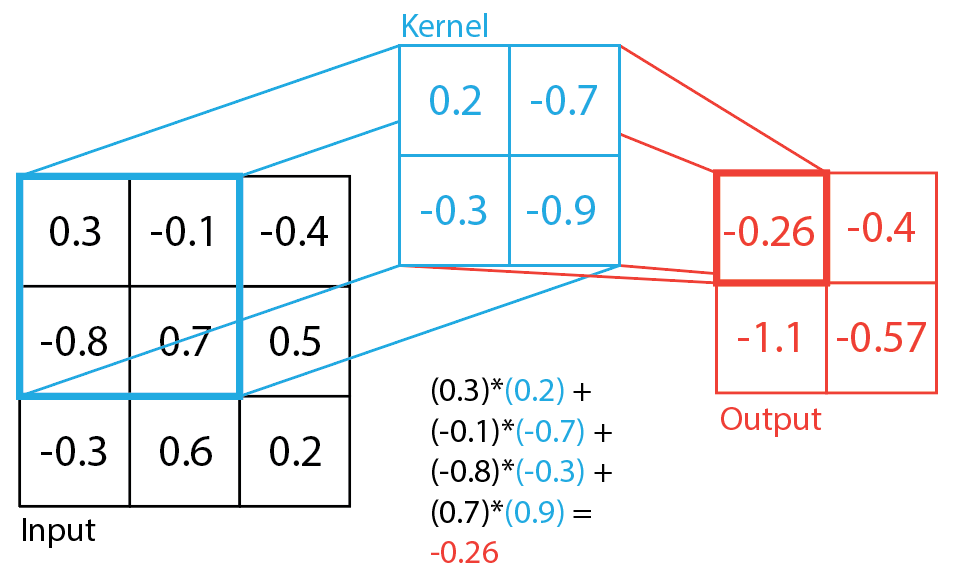

In [3]:
Image(filename = "./ResearchDocumentImages/Conv2d.png", width=500, height=500)

The main motive behind using convolutions in image processing is that it can summarize sections of pixels at once. Usually, each individual pixel by itself holds little significant information, but by considering multiple of them together, more information can be extracted from the resultant pattern. In other words, the whole is greater than the sum of its parts. 


#Project Example: MNIST Reader


The goal of this project is to use convolution, as described above, to do simple image classification. Neural networks that utilize this method are known as Convolutional Neural Networks.


**Important Note:**
Henceforth, all programs will be using PyTorch, a popular neural network library for Python. Most of the functions in the PyTorch library should behave similarly to the homegrown programs above.

PyTorch neural networks need to specify which hardware the program runs on, such as the standard CPU on your computer or your NVIDIA GPU through Cuda (if it is available). Below is a simple function that returns a device that is available on the local hardware. Please consider running this function before proceeding for a smoother experience.

In [11]:
import torch

def find_device():
    use_cuda = torch.cuda.is_available()
    use_mps = torch.backends.mps.is_available()

    if use_cuda:
        return torch.device("cuda")
    elif use_mps:
        return torch.device("mps")
    else:
        return torch.device("cpu")

As mentioned before, it is imperative to use high-quality, standardized, and properly normalized data for training to produce the best results. For testing, large online public datasets are often used as benchmarks, such as the MNIST dataset used in this example. The MNIST dataset is a group of 60000 images of handwritten numerical characters from 0 to 9. The images are standardized as 20x20 pixels in black-and-white. More information can be found here: https://paperswithcode.com/dataset/mnist.

Below is the main architecture of the convolutional neural network used for the project.

In [1]:
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

device = find_device()

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1) #Two convolutional layers to embed input into high dimension vector space
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        #self.dropout1 = nn.Dropout(0.25) #Dropout layers that are present during training to prevent overfitting
        #self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128) #Two linear layers as unembedding
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        #x = self.dropout1(x)
        x = torch.flatten(x)
        x = self.fc1(x)
        x = F.relu(x)
        #x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=-1)
        return output

    def output(self, x):
        return torch.exp(self.forward(x))

The model was trained with an Adadelta optimizer, a initial learning rate of 1, and for 7 total epochs.

Below are the results from training the sample convolutional neural network above on the MNIST dataset. The model is loaded into an applet which includes a display for the predicted value, actual value, as well as a bar graph that indicates the model's confidence in all of the 10 classes. This model achieved an approximately 94% accuracy in testing.

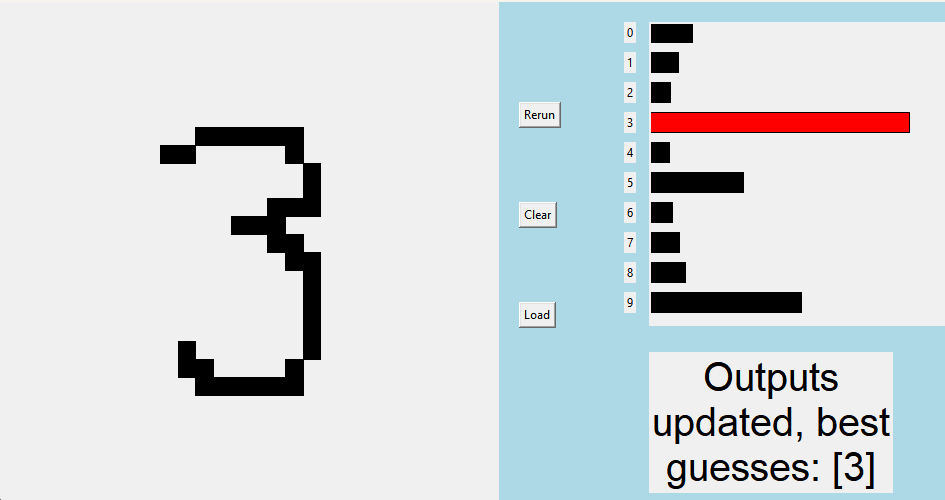

In [5]:
Image(filename = "./ResearchDocumentImages/MNIST1.png", width=500, height=500)

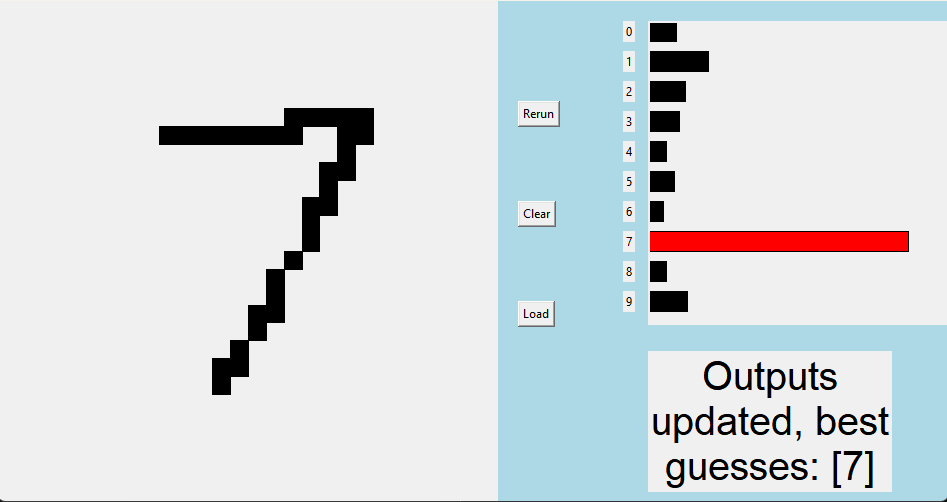

In [7]:
Image(filename = "./ResearchDocumentImages/MNIST2.png", width=500, height=500)

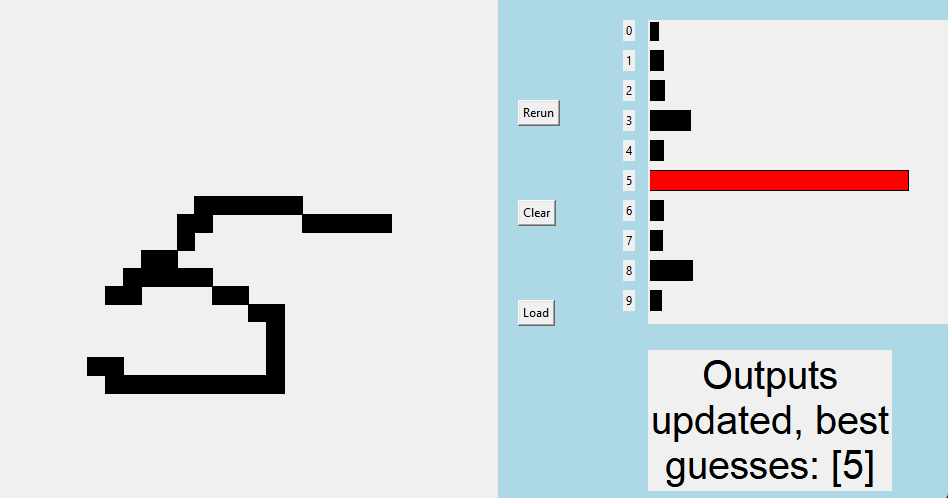

In [6]:
Image(filename = "./ResearchDocumentImages/MNIST3.png", width=500, height=500)

#Residual Connections

So far, the concept of neural networks is for it to act as an function, fundamentally transforming the input into a desired output, as seen below. 

$$
f_n(x) = y
$$
*(where x represents input, y represents the desired output, and the function is analogous to the neural network)*

This strategy works well if the desired behavior only needs minor adjustments between the input and output, but it struggles to make large changes, especially if the network is shallow.

Residual networks solves this by finding the difference function between the input and desired output function, instead of finding a transformation function. This is accomplished by adding the calculated output of the residual layer onto the raw input, before passing it on as the finalized output. In the example below, the function *r(x)* represents what the neurons would output, upon given the input *x*.

$$
r(x) = dx
$$

$$
f_r(x) = x + r(x) = y
$$
*(where x represents input, r(x) represents the residual value, y represents the desired output, and the function f is analogous to the residual network)*

Another benefit of residual networks is that the network would retain some information of the original raw input throughout the entire forward process, since a copy of it is always added to the output before continuing. This preserves the attention of the network, and prevents it from "forgetting what it was doing", in a more human metaphor. As such, deeper neural networks usually employ residual connections for its efficiency and safety.


#Project Example: ResNet18 with CIFAR-10

The CIFAR-10 dataset is a large group of 60000 images of 10 distinct types, each of which are 32 by 32 pixels in standard RGB colors. This dataset has been used for many computer vision applications as example training data. More information can be found here: https://www.cs.toronto.edu/~kriz/cifar.html.

ResNet18 is a famous convolutional neural network that first used residual connections for image recognition. The classic ResNet18 model mainly consists of 8 residual convolutional layers of different dimensions, each resulting a higher dimension vector than the last as embeddings. In this example, the final linear layers are adapted to obtain the final answer of a 10 dimensional vector corresponding to the 10 CIFAR classes, where each dimension represents the model's confidence in the corresponding class as the answer. 

More details can be found here in the original research paper which introduced the idea of residual connections, with all credits belonging to the original authors: https://arxiv.org/abs/1512.03385.

You can access a prebuilt, ready-to-use implementation directly from PyTorch's torchvision library, as seen below.

In [13]:
import torchvision

device = find_device()

model = torchvision.models.resnet18(num_classes=10).to(device) #built in ResNet18 model in the torchvision library

Alternatively, here is an implementation of the ResNet18 model from scratch:

In [12]:
import torch

device = find_device()

class ResNetBlock(nn.Module):
    def __init__(self, channel_in, channel_out, stride, downsample):
        super(ResNetBlock, self).__init__() 

        self.conv1 = nn.Conv2d(channel_in, channel_out, 3, stride, 1)
        self.bn1 = nn.BatchNorm2d(channel_out)
        self.conv2 = nn.Conv2d(channel_out, channel_out, 3, 1, 1)
        self.bn2 = nn.BatchNorm2d(channel_out)

        self.dropout = nn.Dropout(0.3) #Add some dropouts to help prevent overfitting

        self.downsample = downsample

        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        i = x

        y = self.conv1(x)
        y = self.bn1(y)
        y = self.relu(y)

        #print(f"y {y.shape} | i {i.shape}")

        y = self.conv2(y)
        y = self.bn2(y)

        #print(f"y {y.shape} | i {i.shape}")

        if self.downsample is not None:
            i = self.downsample(x)

        #print(f"y {y.shape} | i {i.shape}")

        y += i
        y = self.relu(y)
        y = self.dropout(y)
        return y


class ResNet(nn.Module):
    def __init__(self, img_channel, classes_amt):
        super(ResNet, self).__init__()

        self.conv1 = nn.Conv2d(img_channel, 64, 7, 2)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(3, 2, 1)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, classes_amt)

        self.dropout = nn.Dropout(0.25) #Add some dropouts to help prevent overfitting

        self.layers = [
            self.make_layer(64, 64, 1),
            self.make_layer(64, 128, 2),
            self.make_layer(128, 256, 2),
            self.make_layer(256, 512, 2)
        ]
    
    def make_layer(self, in_channel, out_channel, stride):
        downsample = None
        if stride != 1:
            downsample = nn.Sequential(
                nn.Conv2d(in_channel, out_channel, 1, stride),
                nn.BatchNorm2d(out_channel)
            )

        block = ResNetBlock(in_channel, out_channel, stride, downsample)
        block = block.to(device)

        return block


    def forward(self, x):
        y = self.conv1(x)
        y = self.bn1(y)
        y = self.relu(y)
        y = self.maxpool(y)

        for layer in self.layers:
            #print("running block")
            y = layer.forward(y)
        
        y = self.avgpool(y)
        y = torch.flatten(y, 1)
        y = self.fc(y)
        y = F.softmax(y, 1)

        return y

model = ResNet(3, 10)

The model was trained with an Adadelta optimizer, a initial learning rate of 1, and for 10 total epochs.

Below are the results from the ResNet18 model trained on the CIFAR-10 dataset. This model achieved an approximately 72% accuracy in testing. Note that case 2 and case 3 depicted below are erroneous. 

In addition, the model seems to debate between dogs and cats for the third case, which were the true and predicted values respectively. From a personal subjective view, the input image does have semblences to a cat.

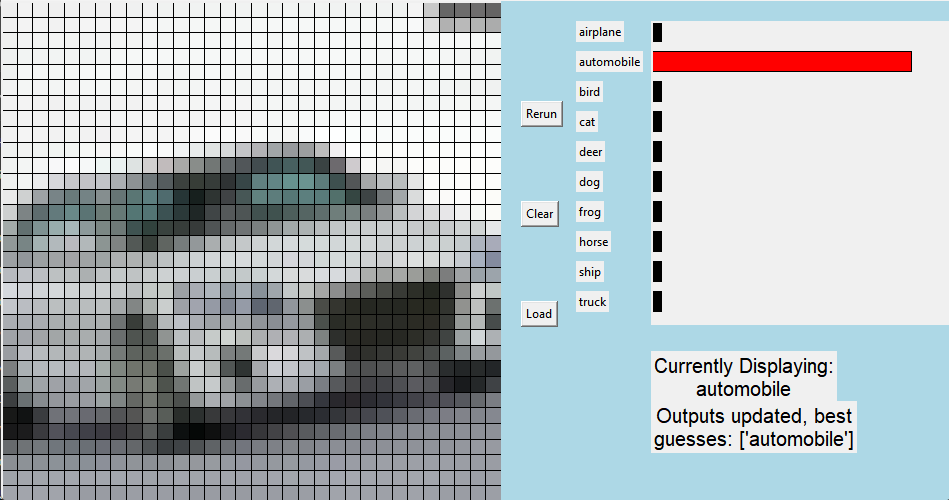

In [8]:
Image(filename = "./ResearchDocumentImages/Resnet1.png", width=500, height=500)

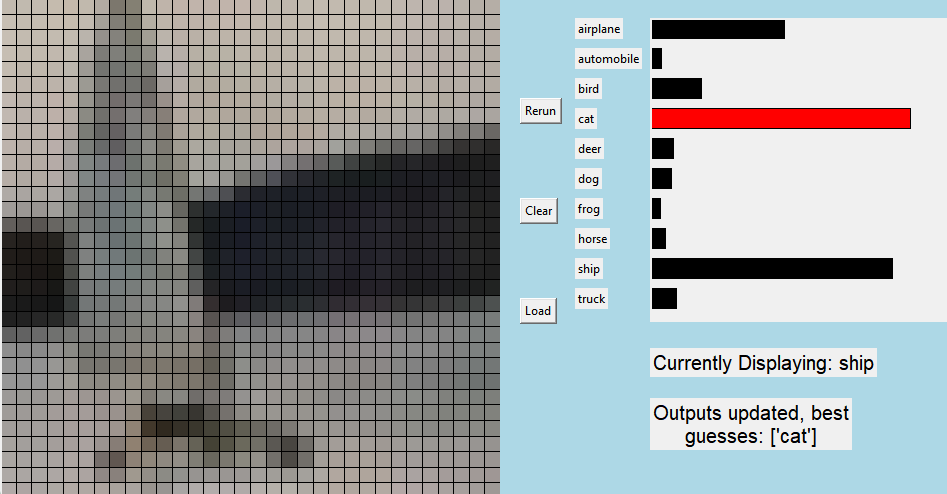

In [9]:
Image(filename = "./ResearchDocumentImages/Resnet2.png", width=500, height=500)

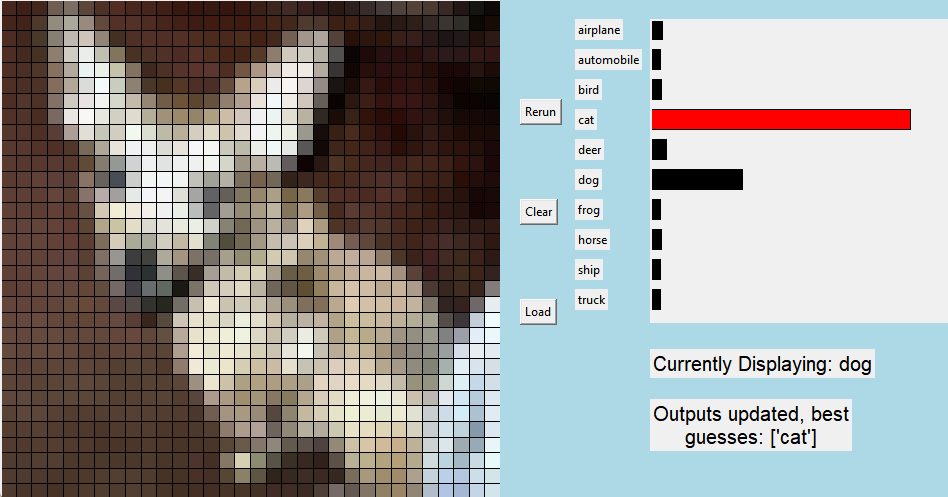

In [10]:
Image(filename = "./ResearchDocumentImages/Resnet3.png", width=500, height=500)

#Project Example: Visual Transformer with CIFAR-10

Visual transformers are another popular varient of image classifier models. 

The raw input image is into multiple chunks, known as patches. 

This program used a public GitHub repository for visual transformer implementation, all credits belong to its contributors. 
The link for the repository is: https://github.com/lucidrains/vit-pytorch






In [ ]:
from vit_pytorch import ViT #Requires downloading the public GitHub repository at https://github.com/lucidrains/vit-pytorch

perceptron = ViT(
    image_size = 32,
    patch_size = 4,
    num_classes = 10,
    dim = 128,
    depth = 2,
    heads = 16,
    mlp_dim = 256,
    dropout = 0.1,
    emb_dropout = 0.1
)

The model was trained with an Adadelta optimizer, a initial learning rate of 1, and for 15 total epochs.

Below are the results from the visual transformer model trained on the CIFAR-10 dataset. This model achieved an approximately 76% accuracy in testing. Note that case 3 depicted below is erroneous. 

In comparison to the ResNet18 example from the previous section, visual transformers have less certain predictions, as seen by the numerous large values in the output bar graphs. This observation would be discussed further in the next section.

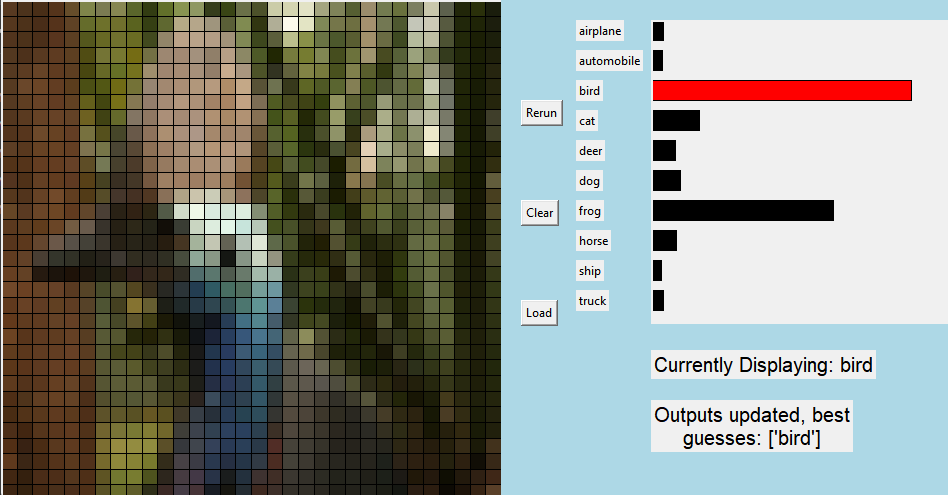

In [12]:
Image(filename = "./ResearchDocumentImages/Vit1.png", width=500, height=500)

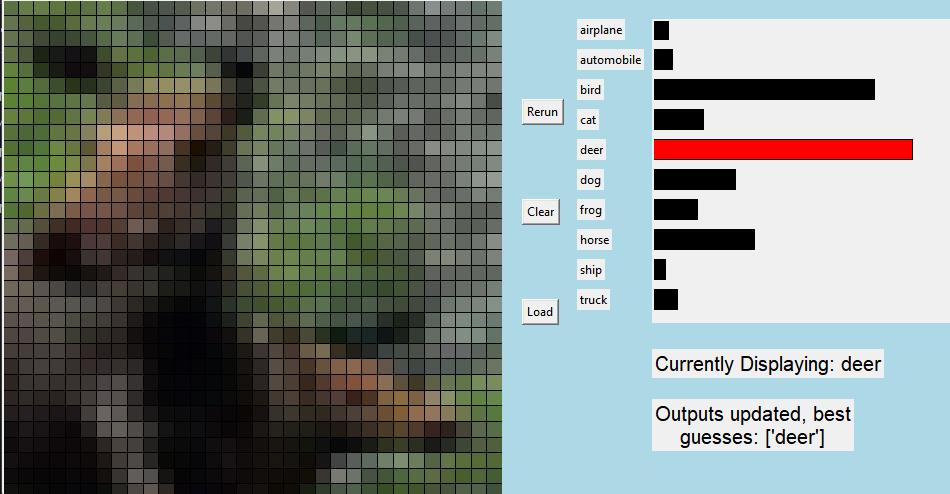

In [11]:
Image(filename = "./ResearchDocumentImages/Vit2.png", width=500, height=500)

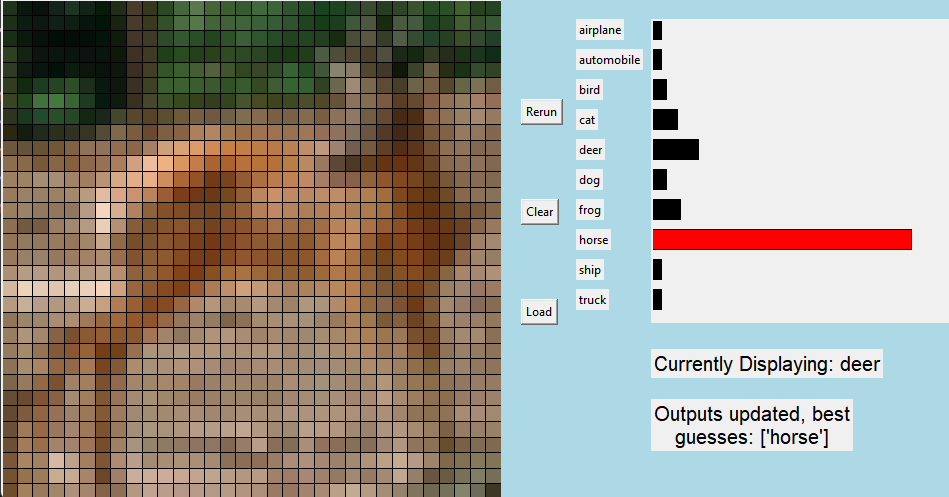

In [13]:
Image(filename = "./ResearchDocumentImages/Vit3.png", width=500, height=500)

#Convolutional Neural Networks verses Visual Transformers



Keypoints, elaborate more later:

CNN:
Intrinsic biases, less flexible
Need less training data, cheaper
Shifting scope, cannot always access every piece of information

ViT:
More broad concepts, tends to learn general rules/patterns, more flexible
Needs more training data, more resource intensive
Constant global scope, has access to every piece of information at all times

Overall, CNNs are recommended for cheap specific solutions, while ViT is better for general classifications in a very diverse environment

#Conclusion

Overall, neural networks are powerful black boxes that can transform into a specific function by finding intrinsic patterns in input and output data. This paper has dicussed the fundamentals of a neural network, as well as its more specific purpose in image recognition and classification.